In [1]:
%matplotlib inline
from IPython.display import Image
from IPython.display import display
from PIL import Image
from random import randint
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

read image

In [2]:
img_path = './kasukasu.JPG'
img = mpimg.imread(img_path)

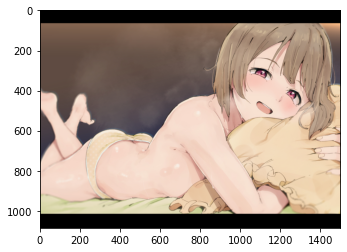

In [3]:
imgplot = plt.imshow(img)
plt.show()

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(1085, 1500, 3)

In [6]:
HEIGHT, WIDTH = img.shape[0], img.shape[1]
n = 0
points = []
nPoints = 100
points = [np.array([randint(0,WIDTH),randint(0,HEIGHT)]) for i in range(nPoints)]

worley_noise = Image.new('RGB',(WIDTH,HEIGHT))

pixels = worley_noise.load()

for x in tqdm(range(WIDTH)):
    for y in range(HEIGHT):
        d = np.zeros(len(points))
        for i,point in enumerate(points):
            d[i] = ((point[0]-x)**2+(point[1]-y)**2)**0.5
        d.sort()
        c = int(d[n])
        pixels[x,y] = (c,c,c)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [11:51<00:00,  2.11it/s]


In [7]:
worley_noise.show()
worley_noise.save('worley_noise.jpg','JPEG')

In [8]:
type(worley_noise)

PIL.Image.Image

In [9]:
processed_img = np.add(img, 0.1*np.array(worley_noise))
processed_img = np.interp(processed_img, (0, 255), (0, 1))

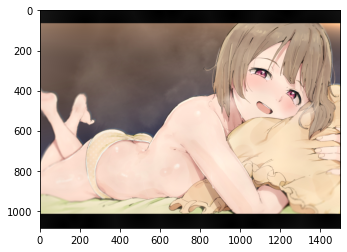

In [10]:
imgplot = plt.imshow(processed_img)

In [11]:
plt.imsave('processed_img.JPEG', processed_img)